# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [80]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
#convert .csv file into dataframe
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
#information on dataset/check for null values
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
#Null value counts across variables
diabetesDF.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [84]:
#exploring the data
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- There do not appear to be any null values
- But appears that any potential null values have been stored as 0 
    - some of the values do not make sense (ex. patients cannot have BMIs of zero)
- These 0's will need to be adjusted for as they will impact our analysis/model
    - Potential outliers

In [85]:
#averages by outcome
"""Following table shows the average values of each predictor for diabetics(Outcome = 1) and non-diabetics(Outcome =0)"""
outcomes_avgs = diabetesDF.groupby('Outcome').mean().reset_index()
outcomes_avgs


,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

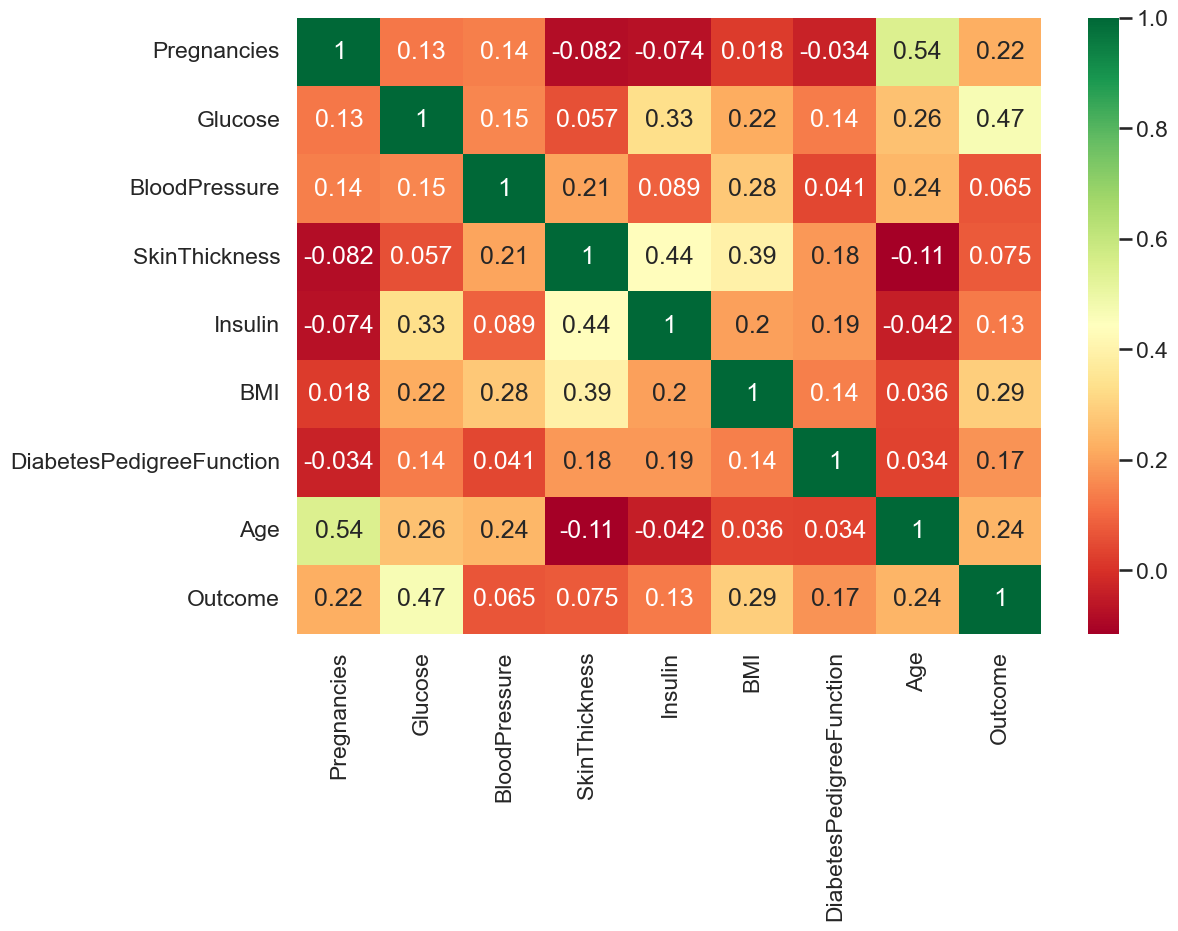

In [86]:
#correlation matrix (heatmap)
corr_matrix = diabetesDF.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')

- As expected there is some correlation between between predictor variables which is unavoidable
    - ex. Age is positively correlated with pregnancies
        - Older = higher likelihood of having more pregnancies

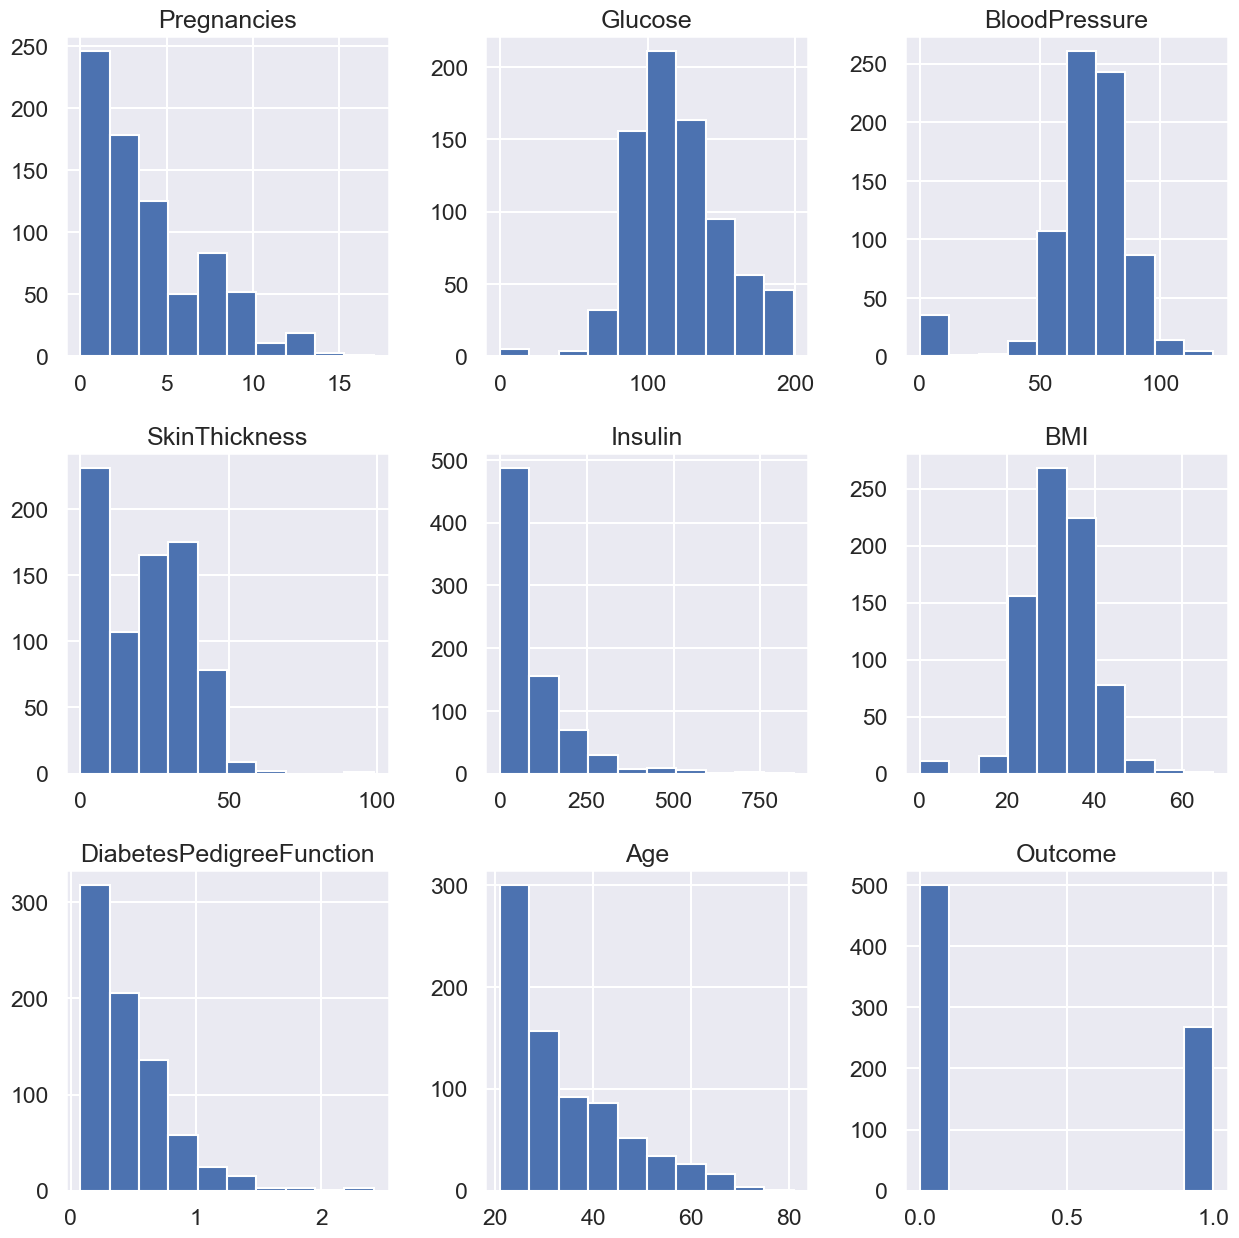

In [87]:
#distributions of predictors (whole dataset)
sns.set_theme(style = 'darkgrid', context = 'talk')

distplot = diabetesDF.hist(figsize=(15,15))


- Many of the predictors are normally distributed (Glucose, Blood Pressure and BMI)
- Other variable resemble a mormal distribution, however, are rightward skewed
- More non-diabetics than diabetics within the dataset

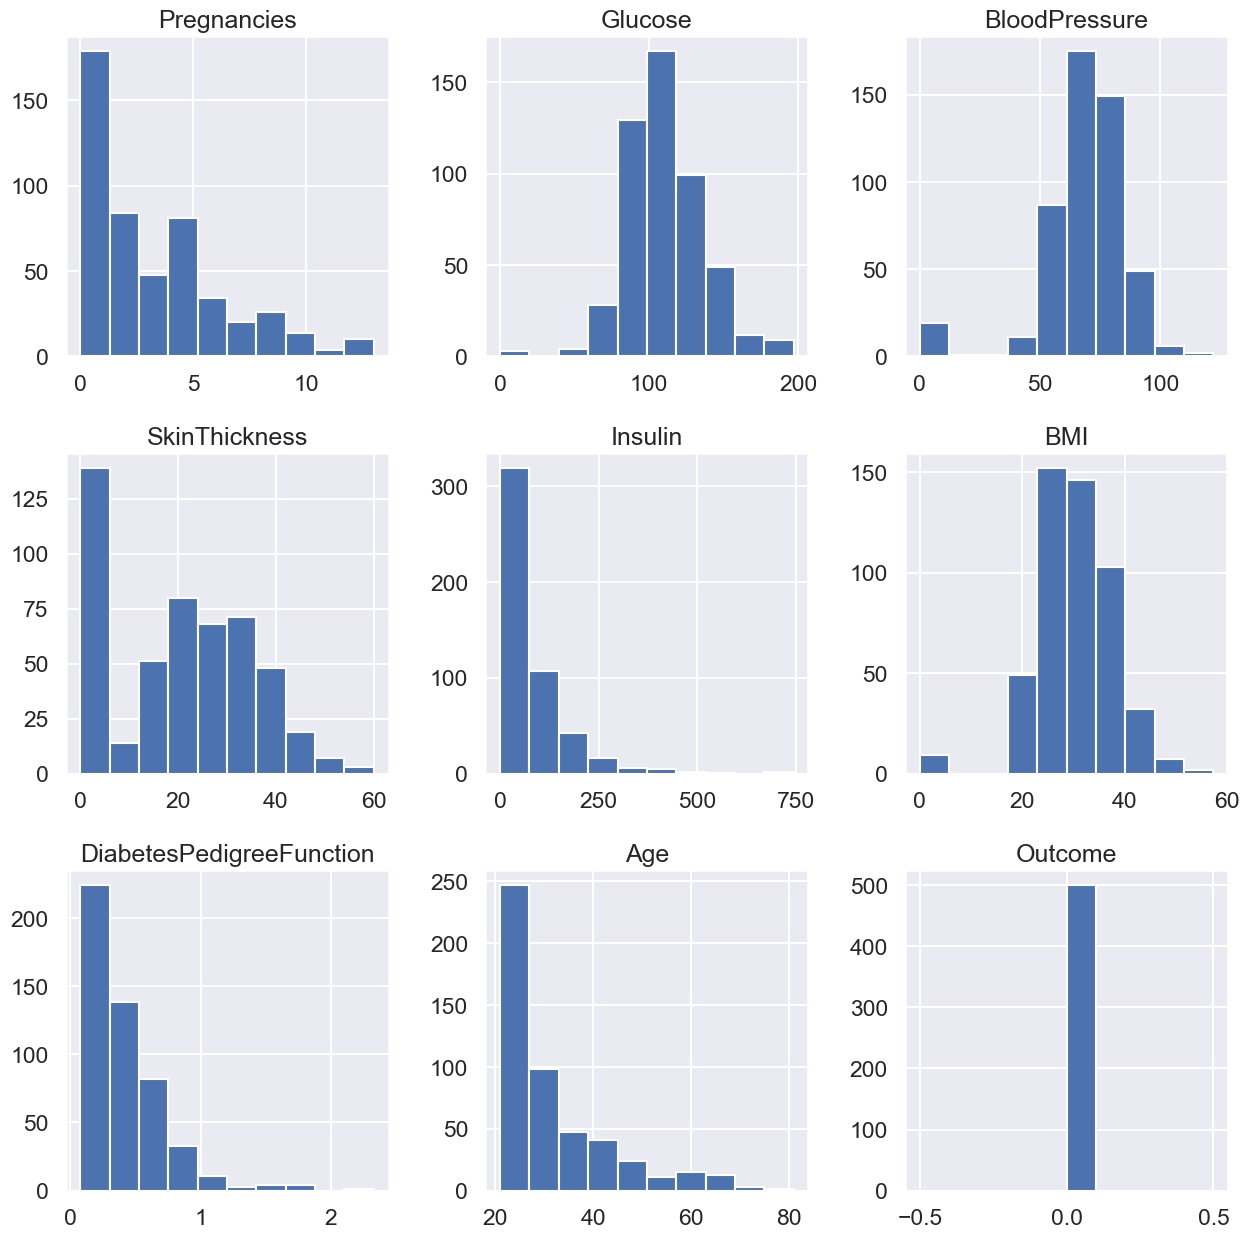

In [88]:
#create dataframes for each outcome group
DF_outcome0 = diabetesDF[diabetesDF['Outcome']== 0]
DF_outcome1 = diabetesDF[diabetesDF['Outcome']== 1]

#distribtuion of outcome 0 
distplot0 = DF_outcome0.hist(figsize=(15,15))

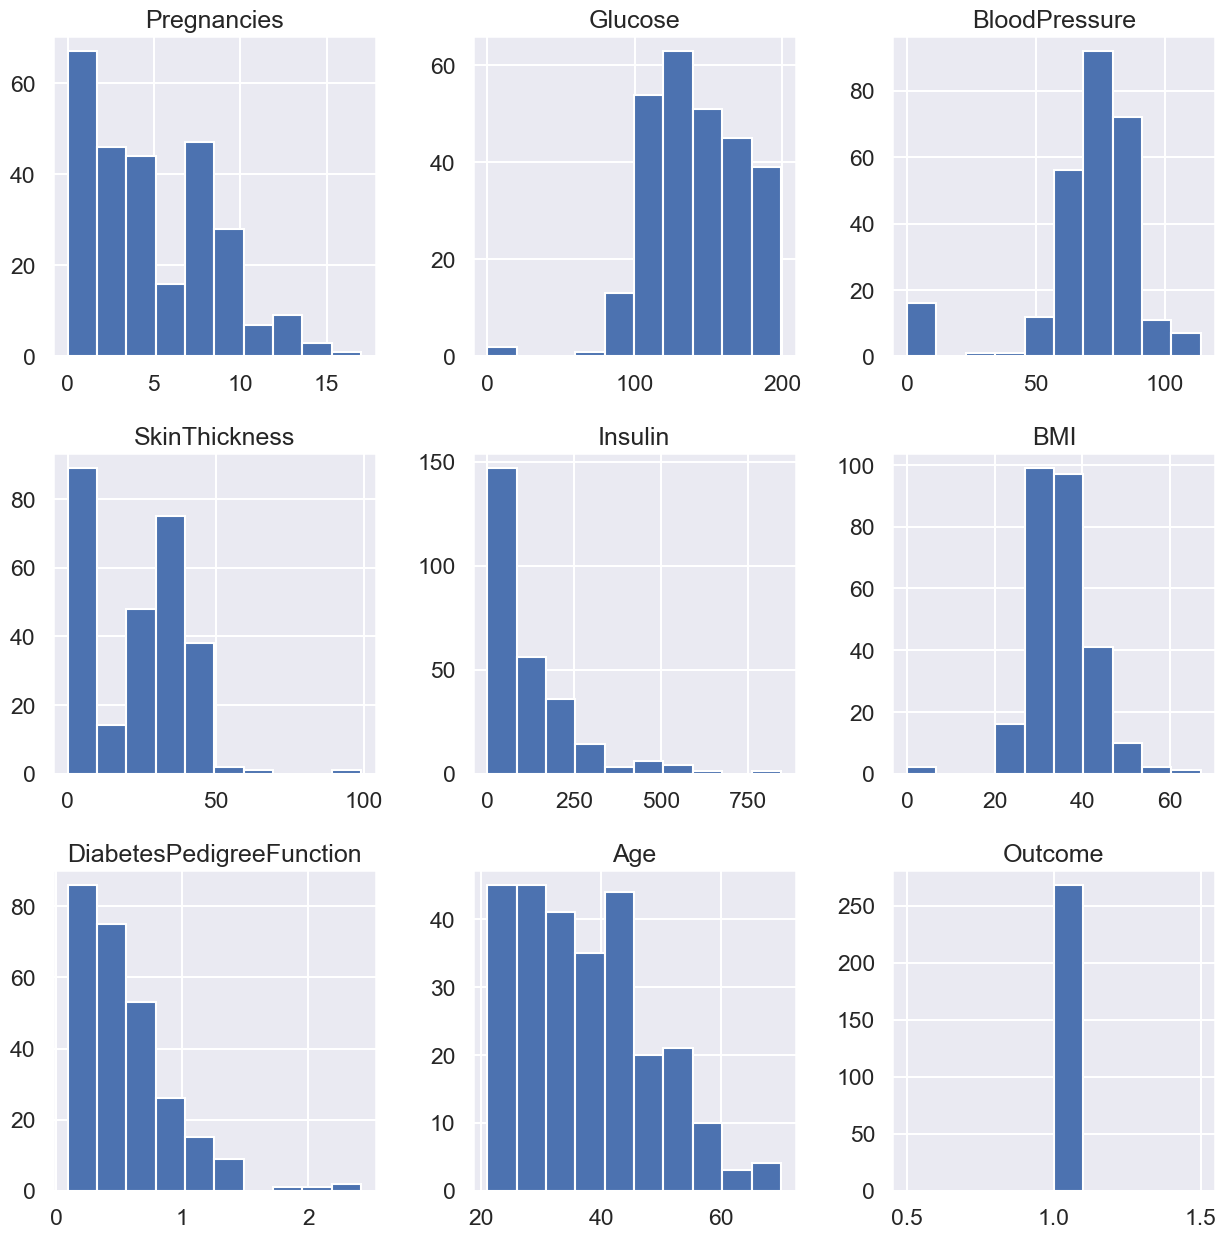

In [89]:
#Distribution of outcome 1 class
distplot1= DF_outcome1.hist(figsize=(15,15))

- When looking at all 3 distributions, some trends may be seen
- Age is much more evenly distributed across the diabetic group compared to the negative group
- Diabetics have, on average, higher levels of glucose and low levels of insulin compared to the negative group
    - Which is to be expected, but is useful to know before training the ML model

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [90]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
"""Dealing with zeros/missing values"""
#For the Glucose, BloodPressures, SkinThickness, Insulin and BMI columns
#replace all the 0 values with that respective categories mean value 

for columnName in diabetesDF.columns[1:6]:
    diabetesDF[columnName].replace(0, diabetesDF[columnName].mean(), inplace=True)

In [92]:
#check if it worked
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [93]:
"""Outliers"""
q1 = diabetesDF['Glucose'].quantile(0.25)
q3 = diabetesDF['Glucose'].quantile(0.75)

IQR = q3 - q1

#defining boundaries
lowerBound = q1 - IQR*1.5
upperBound = q3 + IQR*1.5

#Removing outliers (with respect to glucose) from the dataframe
diabetesDF = diabetesDF[(diabetesDF['Glucose'] >= lowerBound) & (diabetesDF['Glucose'] <= upperBound)]
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 0 outliers had been found/removed

In [94]:
# Scaling and normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# for the desired columns, the scaler uses their respective max and min values to scale the data
    # (ranging from 0 to 1 with 0 being the min and 1 being the max)
# these scaled values now stored in a new dataframe
Scaled_diabetesDF = diabetesDF
Scaled_diabetesDF[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = scaler.fit_transform(Scaled_diabetesDF[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
Scaled_diabetesDF


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.670968,0.489796,0.304348,0.079086,0.314928,0.627,50,1
1,1,0.264516,0.428571,0.239130,0.079086,0.171779,0.351,31,0
2,8,0.896774,0.408163,0.147135,0.079086,0.104294,0.672,32,1
3,1,0.290323,0.428571,0.173913,0.096154,0.202454,0.167,21,0
4,0,0.600000,0.163265,0.304348,0.185096,0.509202,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,0.367742,0.530612,0.445652,0.199519,0.300613,0.171,63,0
764,2,0.503226,0.469388,0.217391,0.079086,0.380368,0.340,27,0
765,5,0.496774,0.489796,0.173913,0.117788,0.163599,0.245,30,0
766,1,0.529032,0.367347,0.147135,0.079086,0.243354,0.349,47,1


In [95]:
#check for class imbalances
diabetesDF['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- No substancial class imbalances
    - roughly 2:1
- No sampling bias
    - data comes directly from the National Institute of Diabetes and Digestive and Kidney Diseases 
    - representative of the population

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [156]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

#splitting training and test data
x = Scaled_diabetesDF.drop('Outcome', axis=1)
y = Scaled_diabetesDF['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [157]:
#Implement Logistic Regression model
log_model = LogisticRegression(max_iter= 1000)
log_model

LogisticRegression(max_iter=1000)

In [158]:
#apply model to the training data
log_model.fit(x_train, y_train)

#create predictions for testing data
log_predict = log_model.predict(x_test)

In [106]:
# create a function to generate the evaluation metrics
def eval_metrics(model, predict, y_true):
    accuracy = accuracy_score(y_true, predict)
    precision = precision_score(y_true, predict)
    recall = recall_score(y_true, predict)
    f1 = f1_score(y_true, predict)
    roc_auc = roc_auc_score(y_true, model.predict_proba(x_test)[:, 1])
    return accuracy, precision, recall, f1, roc_auc

In [159]:
#Display metrics for logistic regression model
log_metrics = eval_metrics(log_model, log_predict, y_test)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metrics in enumerate(metrics_names):
    print(f'{metrics_names[i]}: {log_metrics[i]}')

Accuracy: 0.8116883116883117
Precision: 0.7631578947368421
Recall: 0.5918367346938775
F1-Score: 0.6666666666666667
ROC-AUC: 0.8314868804664723


Random Forest Model

In [162]:
#creating a random forest model
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

#prediction values for testing data
RF_predict = RF_model.predict(x_test)

In [163]:
#Display metrics for random forest model
RF_metrics = eval_metrics(RF_model, RF_predict, y_test)

for i, metrics in enumerate(metrics_names):
    print(f'{metrics_names[i]}: {RF_metrics[i]}')

Accuracy: 0.7727272727272727
Precision: 0.6458333333333334
Recall: 0.6326530612244898
F1-Score: 0.6391752577319587
ROC-AUC: 0.821865889212828


In [172]:
# Cross-validation 
cv_scores_log = cross_val_score(log_model, x_train, y_train, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(RF_model, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (Logistic Regression):", cv_scores_log)
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

Cross-Validation Scores (Logistic Regression): [0.76422764 0.71544715 0.69918699 0.79674797 0.78688525]
Cross-Validation Scores (Random Forest): [0.75609756 0.69918699 0.73170732 0.80487805 0.78688525]


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

EDA
- Dataset did not contain null values
- No substantial class imbalances between diabetics and non-diabetics
    - 2:1 but is realistic in regards to realworld applications

Preprocessing
- Potential nulls had been replaced by 0s
    - These values had been replaced by the mean from their respective categories
- Numeric categories had been scaled/normalized
- Resulting in higher quality data and more consistent model performance

Model Evaluation
- Logistic Regression and Random Forest models had been constructed utilizing the diabetes.csv dataset
- Based on the performance/evaluation metrics, the logistic regression outperformed the random forest model in terms of accuracy, precision and ROC-AUC
    - The random forest model outperformed in terms of recall and F1-score

Cross-Validation
- Both models exhibited consistant and stable performances
- Performance metrics displayed similar results to those prior to the cross-validation
    - logistic regression outperformed random forest in the same metrics prior to the CV